In [2]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/tmdb_cleaned.csv")

# chuyển list từ string về list
for col in ["genres", "keywords", "cast_top5"]:
    df[col] = df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])


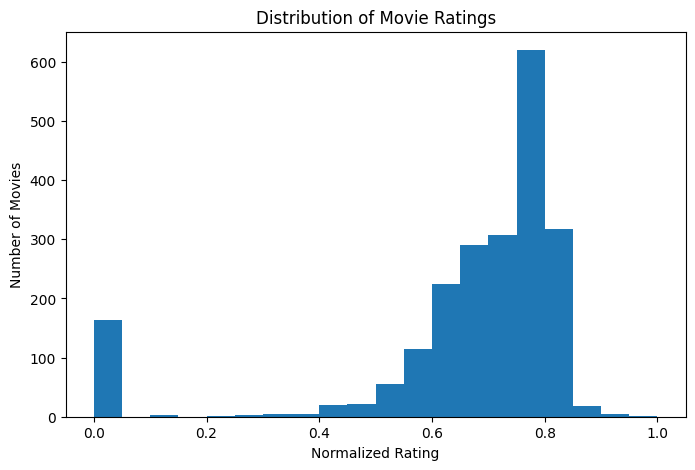

In [3]:
plt.figure(figsize=(8,5))
plt.hist(df["vote_average"], bins=20)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Normalized Rating")
plt.ylabel("Number of Movies")
plt.show()


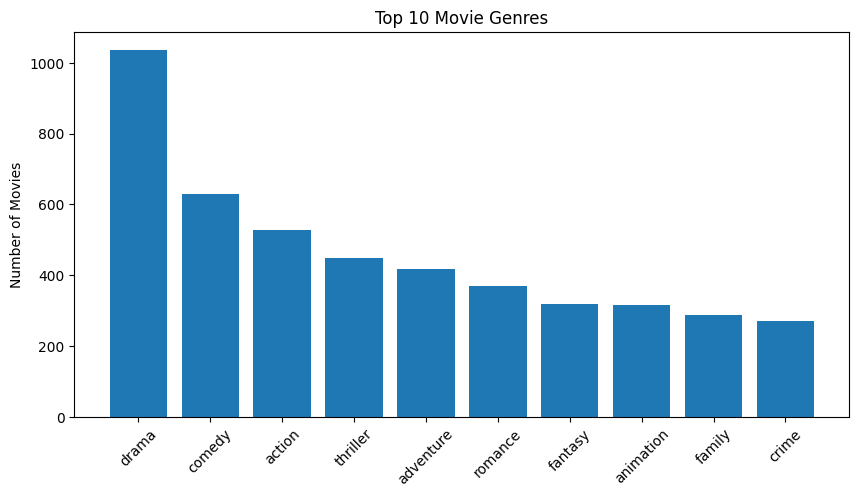

In [4]:
from collections import Counter

all_genres = []
for g in df["genres"]:
    all_genres += g

genre_count = Counter(all_genres)
top_genres = genre_count.most_common(10)

labels = [g[0] for g in top_genres]
values = [g[1] for g in top_genres]

plt.figure(figsize=(10,5))
plt.bar(labels, values)
plt.xticks(rotation=45)
plt.title("Top 10 Movie Genres")
plt.ylabel("Number of Movies")
plt.show()


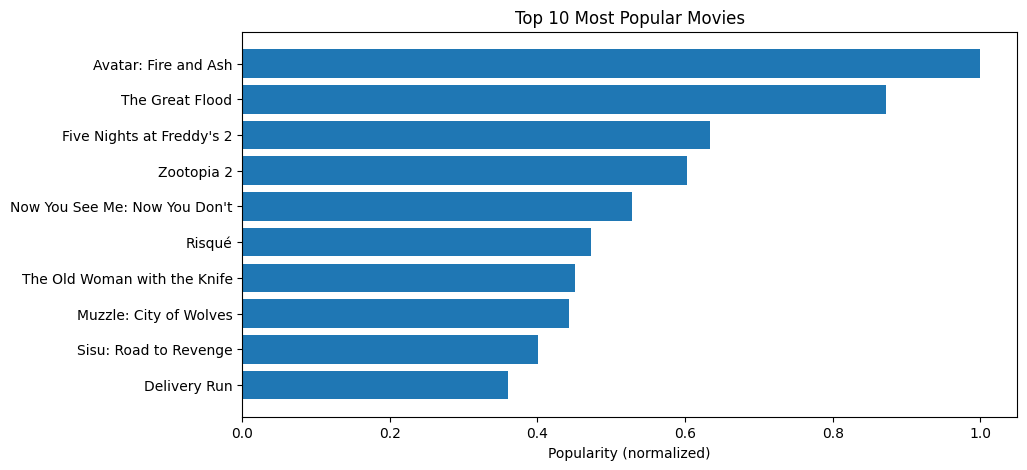

In [5]:
top_movies = df.sort_values("popularity", ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.barh(top_movies["title"], top_movies["popularity"])
plt.gca().invert_yaxis()
plt.title("Top 10 Most Popular Movies")
plt.xlabel("Popularity (normalized)")
plt.show()


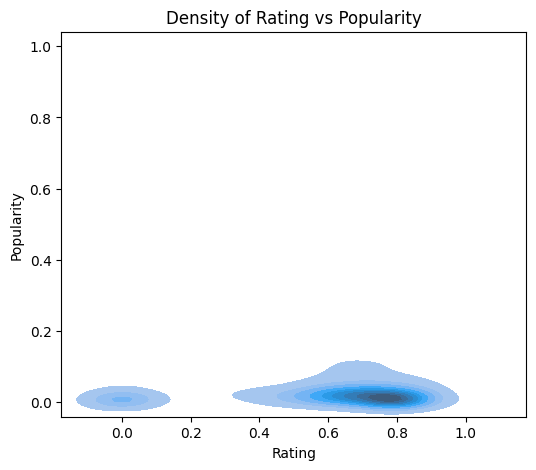

In [6]:
plt.figure(figsize=(6,5))
sns.kdeplot(x=df["vote_average"], y=df["popularity"], fill=True)
plt.title("Density of Rating vs Popularity")
plt.xlabel("Rating")
plt.ylabel("Popularity")
plt.show()


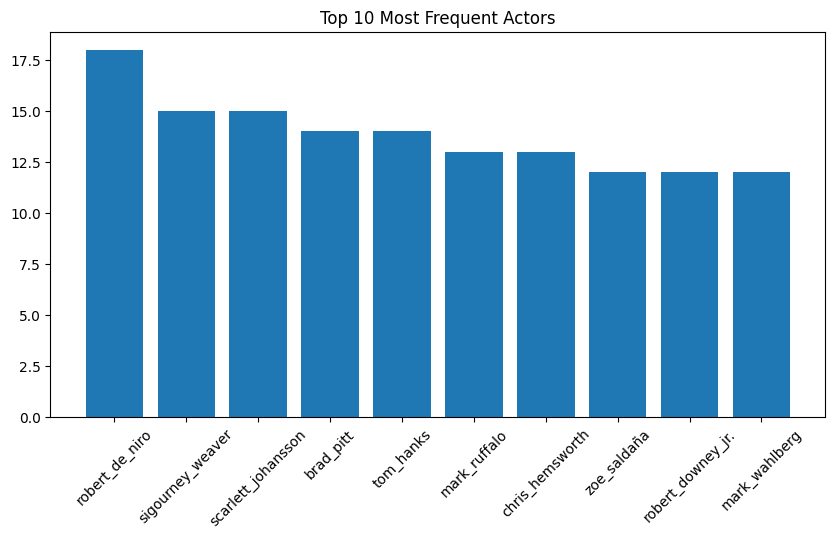

In [7]:
all_cast = []
for c in df["cast_top5"]:
    all_cast += c

cast_count = Counter(all_cast).most_common(10)

names = [x[0] for x in cast_count]
freqs = [x[1] for x in cast_count]

plt.figure(figsize=(10,5))
plt.bar(names, freqs)
plt.xticks(rotation=45)
plt.title("Top 10 Most Frequent Actors")
plt.show()


In [9]:
import plotly.express as px
import pandas as pd
import ast
for col in ["genres", "cast_top5"]:
    df[col] = df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x,str) else [])

fig = px.scatter(
    df,
    x="vote_average",
    y="popularity",
    hover_name="title",
    title="Movie Popularity vs Rating",
    labels={"vote_average": "Rating", "popularity": "Popularity"},
)

fig.show()

In [11]:
fig = px.histogram(
    df,
    x="vote_average",
    nbins=20,
    title="Distribution of Movie Ratings",
    labels={"vote_average": "Rating"}
)
fig.show()


In [12]:
df["year"] = pd.to_datetime(df["release_date"], errors="coerce").dt.year

year_count = df["year"].value_counts().sort_index().reset_index()
year_count.columns = ["Year", "Movies"]

fig = px.line(
    year_count,
    x="Year",
    y="Movies",
    title="Number of Movies Released Over Time"
)
fig.show()


In [13]:
top = df.sort_values("popularity", ascending=False).head(50)

fig = px.scatter(
    top,
    x="vote_average",
    y="popularity",
    size="popularity",
    color="vote_average",
    hover_name="title",
    title="Top 50 Most Popular Movies"
)
fig.show()
